In [1]:
random_seed = 42

# Read data and transform to csv with pandas

In [2]:
rock_dir = "C:/Users/pgrig/Desktop/gitglob/Rock_Paper_Scizors/rock"
rock_dir

'C:/Users/pgrig/Desktop/gitglob/Rock_Paper_Scizors/rock'

In [3]:
paper_dir = "C:/Users/pgrig/Desktop/gitglob/Rock_Paper_Scizors/paper"
paper_dir

'C:/Users/pgrig/Desktop/gitglob/Rock_Paper_Scizors/paper'

In [4]:
scissors_dir = "C:/Users/pgrig/Desktop/gitglob/Rock_Paper_Scizors/scissors"
scissors_dir

'C:/Users/pgrig/Desktop/gitglob/Rock_Paper_Scizors/scissors'

In [5]:
from PIL import Image

In [17]:
import imageio

In [123]:
image = imageio.imread(r"C:\Users\pgrig\Desktop\gitglob\Rock_Paper_Scizors\rock\00nKV8oHuTGi20gq.png")
input_shape = image.shape
input_shape

(200, 300, 3)

In [124]:
import pandas as pd
import numpy as np

In [125]:
# create empty dataframe to store data later
df = pd.DataFrame(columns=np.arange(200*300*3))
df

,0,1,2,3,4,5,6,7,8,9,...,179990,179991,179992,179993,179994,179995,179996,179997,179998,179999


In [126]:
import glob, os

In [127]:
# read all the rock .png files
os.chdir(rock_dir)
i = -1
for image_path in glob.glob('*.png'):
    i = i+1
    image = imageio.imread(image_path)
    
    # check that the dimensions of the picture are ok
    if (image.shape[0] != 200):
        print ('Wrong height pixels')
        break
    elif (image.shape[1] != 300):
        print ('Wrong width pixels')
        break
    elif (image.shape[2] != 3):
        print ('Wrong # of colors')
        break
        
    # flatten image array
    image = image.flatten()
    df.loc[i] = image

In [129]:
# read all the paper .png files
os.chdir(paper_dir)
for image_path in glob.glob('*.png'):
    i = i+1
    image = imageio.imread(image_path)
    
    # check that the dimensions of the picture are ok
    if (image.shape[0] != 200):
        print ('Wrong height pixels')
        break
    elif (image.shape[1] != 300):
        print ('Wrong width pixels')
        break
    elif (image.shape[2] != 3):
        print ('Wrong # of colors')
        break
        
    # flatten image array
    image = image.flatten()
    df.loc[i] = image

In [130]:
# read all the scissor .png files
os.chdir(scissors_dir)
for image_path in glob.glob('*.png'):
    i = i+1
    image = imageio.imread(image_path)
    
    # check that the dimensions of the picture are ok
    if (image.shape[0] != 200):
        print ('Wrong height pixels')
        break
    elif (image.shape[1] != 300):
        print ('Wrong width pixels')
        break
    elif (image.shape[2] != 3):
        print ('Wrong # of colors')
        break
        
    # flatten image array
    image = image.flatten()
    df.loc[i] = image

In [133]:
df["class"] = np.nan

In [131]:
df.shape

(2188, 180000)

**Add classes to our samples.**
- 1 -> rock
- 2 -> paper
- 3 -> scissors

In [142]:
df.loc[0:725,'class'] = 1

In [143]:
df.loc[726:1435,'class'] = 2

In [144]:
df.loc[1436:2187,'class'] = 3

In [147]:
df = df.sample(frac=1).reset_index(drop=True)

In [148]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,179991,179992,179993,179994,179995,179996,179997,179998,179999,class
0,34,118,33,34,118,33,31,115,30,34,...,43,122,41,43,122,41,46,120,41,3.0
1,13,105,32,13,109,33,11,107,32,11,...,3,80,11,2,79,10,2,76,10,1.0
2,16,96,18,16,99,19,16,102,18,18,...,14,92,11,14,92,11,13,88,10,3.0
3,35,120,37,36,122,38,31,117,34,32,...,41,124,42,42,125,43,42,120,41,2.0
4,38,116,40,37,117,40,34,115,38,37,...,41,124,46,41,124,46,42,120,43,2.0


In [149]:
# change direction to current folder
os.chdir(r"C:\Users\pgrig\Desktop\gitglob\Rock_Paper_Scizors")

In [150]:
df.to_csv('data_with_classes_shuffled.csv')

In [151]:
X = df.values

In [165]:
X

array([[34, 118, 33, ..., 120, 41, 3.0],
       [13, 105, 32, ..., 76, 10, 1.0],
       [16, 96, 18, ..., 88, 10, 3.0],
       ...,
       [47, 145, 62, ..., 147, 62, 1.0],
       [48, 141, 58, ..., 149, 68, 2.0],
       [47, 133, 52, ..., 144, 60, 1.0]], dtype=object)

In [183]:
X.shape

(2188, 180000)

**Split X,y and reshape X**

In [178]:
y = X[:,-1]
y

array([3.0, 1.0, 3.0, ..., 1.0, 2.0, 1.0], dtype=object)

In [179]:
X = X[:,:-1]

In [185]:
X = X.reshape(2188, 200, 300, 3)

In [190]:
X = X.astype(float)

Plot one example image

In [191]:
import matplotlib.pyplot as plt
%matplotlib inline

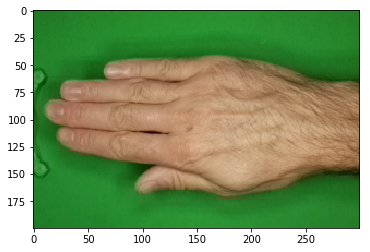

In [194]:
plt.imshow(X[0][:,:,:].astype('uint8'))

# Read data with Data Generator.flow_from_directory

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
pixel_size = (200,300)

In [4]:
batch_size = 8

In [5]:
data_dir = r"C:\Users\pgrig\Desktop\gitglob\Rock_Paper_Scizors\data"

In [6]:
# create data generator
data_gen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 0,
    width_shift_range = 0,
    height_shift_range = 0,
    brightness_range = [1, 1],
    shear_range = 0,
    zoom_range = [1, 1],
    fill_mode = 'nearest',
    horizontal_flip = True,
    vertical_flip = True,
    rescale = 1./255, # normalization
    validation_split = 0.2
)

In [7]:
train_gen = data_gen.flow_from_directory(
    data_dir,
    target_size = pixel_size,
    color_mode = "rgb", # "grayscale" = black/white
    batch_size = batch_size,
    # save_to_dir = r"C:\Users\pgrig\Desktop\gitglob\Rock_Paper_Scizors\aug_train_data",
    class_mode = "categorical",
    shuffle = True,
    seed = random_seed,
    subset = "training"
)

Found 1751 images belonging to 3 classes.


In [8]:
val_gen = data_gen.flow_from_directory(
    data_dir,
    target_size = pixel_size, # make our images smaller
    color_mode = "rgb", # "grayscale" = black/white
    batch_size = batch_size,
    # save_to_dir = r"C:\Users\pgrig\Desktop\gitglob\Rock_Paper_Scizors\aug_val_data",
    class_mode = 'categorical',
    shuffle= False,
    seed = random_seed,
    subset = 'validation'
)

Found 437 images belonging to 3 classes.


# Create CNN

In [53]:
input_shape = (200,300,3)
epochs = 20

In [54]:
from keras import models
from keras import layers

In [55]:
# basis of convolutional network
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [56]:
# pass to fully connected layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 200, 300, 32)      896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 200, 300, 32)      9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 100, 150, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 100, 150, 32)      9248      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 100, 150, 32)      9248      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 100, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 50, 75, 32)        0         
__________

In [58]:
# 97%
if (0):
    # basis of convolutional network
    model = models.Sequential()
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # pass to fully connected layer
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(3, activation='softmax'))
    
    # reducing factor = 0.2

In [59]:
from keras import optimizers

In [60]:
optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [61]:
# Compile the model
model.compile(optimizer = 'Adam',
              loss = "categorical_crossentropy", 
              metrics=["accuracy"])

In [62]:
from keras.callbacks import ReduceLROnPlateau

In [63]:
# Define callback for learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                              factor=0.2,
                              patience=2, 
                              verbose=1,
                              mode = 'max',
                              min_lr=0.0000001)

In [64]:
train_step = train_gen.n//train_gen.batch_size
val_step = val_gen.n//val_gen.batch_size

In [65]:
# fit model
history = model.fit_generator(
    generator = train_gen, 
    steps_per_epoch  = train_step, 
    validation_data  = val_gen,
    validation_steps = val_step,
    epochs = epochs, 
    verbose = 1,
    callbacks = [reduce_lr]
)

Epoch 1/20
218/218 [==============================] - 597s 3s/step - loss: 0.8305 - acc: 0.6018 - val_loss: 0.6447 - val_acc: 0.7389
Epoch 2/20
218/218 [==============================] - 610s 3s/step - loss: 0.3987 - acc: 0.8561 - val_loss: 0.4119 - val_acc: 0.8485
Epoch 3/20
218/218 [==============================] - 932s 4s/step - loss: 0.2874 - acc: 0.8967 - val_loss: 0.2364 - val_acc: 0.9231
Epoch 4/20
218/218 [==============================] - 603s 3s/step - loss: 0.2042 - acc: 0.9305 - val_loss: 0.1325 - val_acc: 0.9510
Epoch 5/20
218/218 [==============================] - 604s 3s/step - loss: 0.1482 - acc: 0.9558 - val_loss: 0.1530 - val_acc: 0.9627
Epoch 6/20
218/218 [==============================] - 602s 3s/step - loss: 0.1286 - acc: 0.9540 - val_loss: 0.1308 - val_acc: 0.9487
Epoch 7/20
218/218 [==============================] - 604s 3s/step - loss: 0.0881 - acc: 0.9736 - val_loss: 0.0992 - val_acc: 0.9650
Epoch 8/20
218/218 [==============================] - 602s 3s/step - 

In [66]:
# evaluate model
val_loss, val_acc = model.evaluate_generator(generator = val_gen,
                         steps = val_step)
print ("Validation Loss:", val_loss)
print ("Validation Accuracy: {} %".format(100*val_acc))

Validation Loss: 0.06480323145026914
Validation Accuracy: 98.36829836829837 %


# Plot accuracy and loss graphs

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

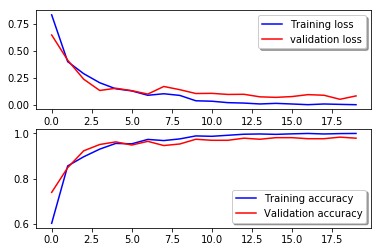

In [68]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)